In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [2]:
data = pd.read_csv('all_data_kmeans.csv')
data.head()

,country,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Canada,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
1,Mexico,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001610,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
2,US,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.199897,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
3,Argentina,0.000000,0.00000,0.000000,0.00000,0.000000,0.000475,0.000499,0.000644,0.000490,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271
4,Brazil,0.000000,0.00000,0.000000,0.00000,0.000000,0.009260,0.012012,0.015906,0.014416,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916


In [4]:
df1 = data[['2011.0_renewable']]
df2 = data[['2011.0_oil']]
df3 = data[['2011.0_gas']]
df4 = data[['2011.0_nuclear']]
df5 = data[['2011.0_hydroelec']]
df6 = data[['2011.0_coal']]
df7 = data[['2011.0_co2_emission']]

In [5]:
merge2 = pd.concat([df1, df2], axis=1)
merge3 = pd.concat([merge2, df3], axis=1)
merge4 = pd.concat([merge3, df4], axis=1)
merge5 = pd.concat([merge4, df5], axis=1)
merge6 = pd.concat([merge5, df6], axis=1)
merge7 = pd.concat([merge6, df7], axis=1)

merge7

,2011.0_renewable,2011.0_oil,2011.0_gas,2011.0_nuclear,2011.0_hydroelec,2011.0_coal,2011.0_co2_emission
0,0.250820,4.542190,3.511123,0.867045,3.505227,0.928738,541.020754
1,0.088399,3.973258,2.549106,0.094125,0.338376,0.616777,465.846905
2,3.090966,34.889781,23.695589,7.760030,2.948938,19.703057,5336.435925
3,0.052376,1.176312,1.578232,0.059707,0.369822,0.052627,168.746975
4,0.878427,4.825940,0.989403,0.146091,3.996033,0.646811,423.761618
...,...,...,...,...,...,...,...
77,0.048839,4.651923,1.744037,1.443453,0.042893,3.503824,617.680146
78,0.001231,0.191629,0.000000,0.000000,0.042764,0.012523,14.823531
79,0.031693,1.865076,0.613438,0.392916,0.037315,1.670210,270.012803
80,0.068278,2.162746,1.595450,0.000000,0.074027,0.657068,253.540475


In [6]:
rename_cols = merge7.rename(columns = lambda x: x.strip('2011.0_'))
rename_cols

,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission
0,0.250820,4.542190,3.511123,0.867045,3.505227,0.928738,541.020754
1,0.088399,3.973258,2.549106,0.094125,0.338376,0.616777,465.846905
2,3.090966,34.889781,23.695589,7.760030,2.948938,19.703057,5336.435925
3,0.052376,1.176312,1.578232,0.059707,0.369822,0.052627,168.746975
4,0.878427,4.825940,0.989403,0.146091,3.996033,0.646811,423.761618
...,...,...,...,...,...,...,...
77,0.048839,4.651923,1.744037,1.443453,0.042893,3.503824,617.680146
78,0.001231,0.191629,0.000000,0.000000,0.042764,0.012523,14.823531
79,0.031693,1.865076,0.613438,0.392916,0.037315,1.670210,270.012803
80,0.068278,2.162746,1.595450,0.000000,0.074027,0.657068,253.540475


In [7]:
df = data[['country']]
df

,country
0,Canada
1,Mexico
2,US
3,Argentina
4,Brazil
...,...
77,South Korea
78,Sri Lanka
79,Taiwan
80,Thailand


In [8]:
merge_2011 = pd.concat([df, rename_cols], axis=1)
merge_2011

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission
0,Canada,0.250820,4.542190,3.511123,0.867045,3.505227,0.928738,541.020754
1,Mexico,0.088399,3.973258,2.549106,0.094125,0.338376,0.616777,465.846905
2,US,3.090966,34.889781,23.695589,7.760030,2.948938,19.703057,5336.435925
3,Argentina,0.052376,1.176312,1.578232,0.059707,0.369822,0.052627,168.746975
4,Brazil,0.878427,4.825940,0.989403,0.146091,3.996033,0.646811,423.761618
...,...,...,...,...,...,...,...,...
77,South Korea,0.048839,4.651923,1.744037,1.443453,0.042893,3.503824,617.680146
78,Sri Lanka,0.001231,0.191629,0.000000,0.000000,0.042764,0.012523,14.823531
79,Taiwan,0.031693,1.865076,0.613438,0.392916,0.037315,1.670210,270.012803
80,Thailand,0.068278,2.162746,1.595450,0.000000,0.074027,0.657068,253.540475


In [9]:
merge_2011['renewable_percent'] = (merge_2011['renewable'] / merge_2011['renewable'].sum()) * 100

merge_2011['oil_percent'] = (merge_2011['oil'] / merge_2011['oil'].sum()) * 100

merge_2011['gas_percent'] = (merge_2011['gas'] / merge_2011['gas'].sum()) * 100

merge_2011['nuclear_percent'] = (merge_2011['nuclear'] / merge_2011['nuclear'].sum()) * 100

merge_2011['hydroelec_percent'] = (merge_2011['hydroelec'] / merge_2011['hydroelec'].sum()) * 100

merge_2011['coal_percent'] = (merge_2011['coal'] / merge_2011['coal'].sum()) * 100

merge_2011['co2_percent'] = (merge_2011['co2_emission'] / merge_2011['co2_emission'].sum()) * 100

merge_2011

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.250820,4.542190,3.511123,0.867045,3.505227,0.928738,541.020754,2.267122,2.793948,3.554943,3.751754,11.913173,0.607747,1.820785
1,Mexico,0.088399,3.973258,2.549106,0.094125,0.338376,0.616777,465.846905,0.799021,2.443992,2.580919,0.407284,1.150036,0.403606,1.567790
2,US,3.090966,34.889781,23.695589,7.760030,2.948938,19.703057,5336.435925,27.938702,21.461068,23.991318,33.578112,10.022520,12.893274,17.959574
3,Argentina,0.052376,1.176312,1.578232,0.059707,0.369822,0.052627,168.746975,0.473415,0.723562,1.597929,0.258357,1.256908,0.034438,0.567912
4,Brazil,0.878427,4.825940,0.989403,0.146091,3.996033,0.646811,423.761618,7.939951,2.968486,1.001751,0.632142,13.581267,0.423260,1.426154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,South Korea,0.048839,4.651923,1.744037,1.443453,0.042893,3.503824,617.680146,0.441447,2.861447,1.765803,6.245909,0.145779,2.292830,2.078779
78,Sri Lanka,0.001231,0.191629,0.000000,0.000000,0.042764,0.012523,14.823531,0.011128,0.117873,0.000000,0.000000,0.145343,0.008195,0.049888
79,Taiwan,0.031693,1.865076,0.613438,0.392916,0.037315,1.670210,270.012803,0.286467,1.147228,0.621093,1.700171,0.126820,1.092951,0.908718
80,Thailand,0.068278,2.162746,1.595450,0.000000,0.074027,0.657068,253.540475,0.617155,1.330327,1.615362,0.000000,0.251595,0.429972,0.853281


In [10]:
merge_2011.fillna(0)
merge_2011.isna().sum()

country              0
renewable            1
oil                  1
gas                  1
nuclear              1
hydroelec            1
coal                 1
co2_emission         1
renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [11]:
null_columns=merge_2011.columns[merge_2011.isnull().any()]
merge_2011[null_columns].isnull().sum()
print(merge_2011[merge_2011["renewable"].isnull()][null_columns])

    renewable  oil  gas  nuclear  hydroelec  coal  co2_emission  \
49        NaN  NaN  NaN      NaN        NaN   NaN           NaN   

    renewable_percent  oil_percent  gas_percent  nuclear_percent  \
49                NaN          NaN          NaN              NaN   

    hydroelec_percent  coal_percent  co2_percent  
49                NaN           NaN          NaN  


In [12]:
merge_2011.loc[[49]]

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
49,USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
merge_2011 = merge_2011.drop([2, 49])

In [14]:
selected_data = merge_2011.iloc[:, [0, 8, 9, 10, 11, 12, 13, 14]]
selected_data

,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,2.267122,2.793948,3.554943,3.751754,11.913173,0.607747,1.820785
1,Mexico,0.799021,2.443992,2.580919,0.407284,1.150036,0.403606,1.567790
3,Argentina,0.473415,0.723562,1.597929,0.258357,1.256908,0.034438,0.567912
4,Brazil,7.939951,2.968486,1.001751,0.632142,13.581267,0.423260,1.426154
5,Chile,0.392285,0.466456,0.212737,0.000000,0.650316,0.157804,0.292812
...,...,...,...,...,...,...,...,...
77,South Korea,0.441447,2.861447,1.765803,6.245909,0.145779,2.292830,2.078779
78,Sri Lanka,0.011128,0.117873,0.000000,0.000000,0.145343,0.008195,0.049888
79,Taiwan,0.286467,1.147228,0.621093,1.700171,0.126820,1.092951,0.908718
80,Thailand,0.617155,1.330327,1.615362,0.000000,0.251595,0.429972,0.853281


In [15]:
selected_data.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.900766,0.981737,0.950109,0.830274,1.124719,1.088834,1.025505
std,1.916215,1.645921,1.176228,2.355028,3.137390,5.882843,3.371549
min,0.000000,0.018479,0.000000,0.000000,0.000000,0.000000,0.008451
25%,0.019617,0.191502,0.146566,0.000000,0.026338,0.008906,0.155257
50%,0.143401,0.368338,0.445869,0.000000,0.250777,0.082809,0.290926
75%,0.805285,0.977134,1.500100,0.546153,0.839659,0.408325,0.932968
max,10.054712,12.106836,5.583762,17.858451,21.816027,52.160905,29.697894


In [90]:
# list(selected_data['country'])

In [100]:
# desired_values = selected_data[(selected_data['renewable_percent'] < 4) & (selected_data['oil_percent']<4) & (selected_data['gas_percent'] < 4)&(selected_data['nuclear_percent'] < 4)&
#               (selected_data['hydroelec_percent'] < 4)& (selected_data['coal_percent'] < 4) & (selected_data['co2_percent'])]

In [17]:
#  desired_values.describe()

In [102]:
# list(desired_values['country'])

In [18]:
# removed_countries = selected_data[~selected_data.country.isin(desired_values['country'])]
# removed_countries

In [104]:
# removed_countries.to_csv('excluded_equal_greaterthan_4percent_2011.csv', index=False)

In [105]:
#  desired_values = desired_values.reset_index()

In [16]:
#  desired_values.isnull().sum()

In [19]:
# desired_values

In [52]:
features = selected_data.iloc[:,[2,3,4,5,6]]
features

,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent
0,2.793948,3.554943,3.751754,11.913173,0.607747
1,2.443992,2.580919,0.407284,1.150036,0.403606
3,0.723562,1.597929,0.258357,1.256908,0.034438
4,2.968486,1.001751,0.632142,13.581267,0.423260
5,0.466456,0.212737,0.000000,0.650316,0.157804
...,...,...,...,...,...
77,2.861447,1.765803,6.245909,0.145779,2.292830
78,0.117873,0.000000,0.000000,0.145343,0.008195
79,1.147228,0.621093,1.700171,0.126820,1.092951
80,1.330327,1.615362,0.000000,0.251595,0.429972


In [53]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


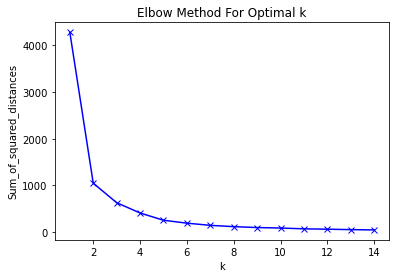

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# Use n_clusters=5 as the k value

kmeans = KMeans(n_clusters=6, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')

In [56]:
# Fit the model to the data
model = kmeans.fit(features)

centroids = model.cluster_centers_
print(centroids)


[[ 3.88035175  2.74843438  4.62060876  1.87438546  3.95182367]
 [ 0.33540037  0.34580776  0.22466848  0.39423778  0.18431242]
 [12.10683572  4.92659109  3.52011573 21.8160273  52.16090544]
 [ 2.88121706  2.27834733  2.19194817 12.7472198   0.51550335]
 [ 2.12541586  1.5680134  17.85845136  1.42020025  0.26763113]
 [ 1.51502619  2.16240063  0.59972213  0.72949723  0.46989953]]


In [57]:
# Predict the clusters
predicted_clusters = kmeans.predict(features)

In [58]:
predicted_clusters

array([3, 5, 5, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       0, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5,
       5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 5, 1,
       2, 0, 5, 0, 1, 1, 1, 1, 1, 0, 1, 1, 5, 1])

In [59]:
len(predicted_clusters)

80

In [60]:
labels = pd.DataFrame(model.labels_)

labeleddata = pd.concat((selected_data,labels),axis=1, join='inner')

labeleddata = labeleddata.rename({0:'labels'},axis=1)

labeleddata



,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,Canada,2.267122,2.793948,3.554943,3.751754,11.913173,0.607747,1.820785,3
1,Mexico,0.799021,2.443992,2.580919,0.407284,1.150036,0.403606,1.567790,5
3,Argentina,0.473415,0.723562,1.597929,0.258357,1.256908,0.034438,0.567912,3
4,Brazil,7.939951,2.968486,1.001751,0.632142,13.581267,0.423260,1.426154,1
5,Chile,0.392285,0.466456,0.212737,0.000000,0.650316,0.157804,0.292812,1
...,...,...,...,...,...,...,...,...,...
75,Philippines,0.940209,0.362579,0.138721,0.000000,0.307482,0.211710,0.271429,0
76,Singapore,0.051445,1.649007,0.302060,0.000000,0.000000,0.000175,0.648600,1
77,South Korea,0.441447,2.861447,1.765803,6.245909,0.145779,2.292830,2.078779,1
78,Sri Lanka,0.011128,0.117873,0.000000,0.000000,0.145343,0.008195,0.049888,5


In [61]:
labels

,0
0,3
1,5
2,5
3,3
4,1
...,...
75,0
76,1
77,1
78,5


In [62]:
label_series = pd.Series(predicted_clusters)
labels_combine = pd.concat([labels, label_series], axis=1 )

In [63]:

labels_combine

,0,0
0,3,3
1,5,5
2,5,5
3,3,3
4,1,1
...,...,...
75,0,0
76,1,1
77,1,1
78,5,5


In [64]:
len(labels)

80

In [65]:
len(labeleddata)

78

In [66]:
labeleddata.to_csv('allincluded__labeled_2011.csv', index=False)

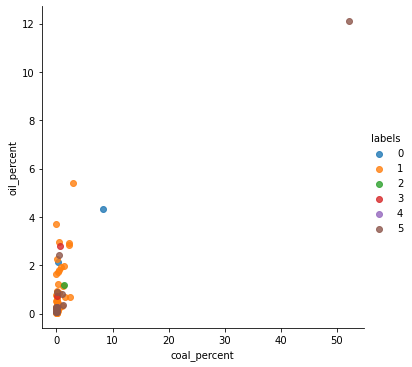

In [67]:
sns.lmplot(x='coal_percent',y='oil_percent',data=labeleddata,hue='labels',fit_reg=False)

In [68]:
labeleddata['Constant'] = "Data"
#This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.

<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

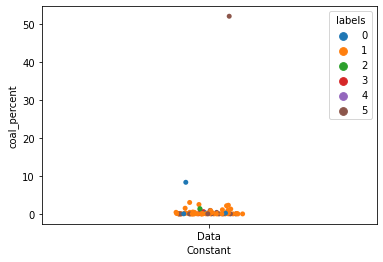

In [69]:
sns.stripplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'],jitter=True)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

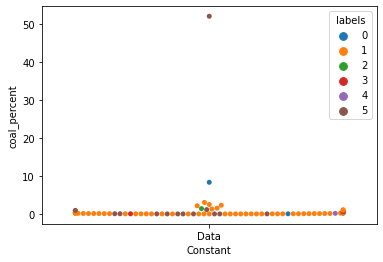

In [70]:
sns.swarmplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'])

In [71]:
# labeleddata.to_csv('diff_labeling_method_2000.csv', index=False)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
ccinfo_pca = pca.fit_transform(features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)

In [73]:
# Review the PCA DataFrame
ccinfo_pca_df.head()

,PCA1,PCA2
0,4.757153,5.190727
1,-0.167550,0.285209
2,-0.922917,-0.225110
3,4.823630,2.159049
4,-1.255348,-0.862546


In [65]:
# kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=600, algorithm = 'auto')
# model = kmeans.fit(ccinfo_pca_df)
# labels = kmeans.predict(ccinfo_pca_df)

In [66]:
# ccinfo_pca_df["labels"] = labels

In [67]:
# labels

In [68]:
# conda install hvplot -y

In [69]:
# !conda install -c pyviz hvplot -y

In [70]:
# # Plot the clusters
# import hvplot.pandas
# ccinfo_pca_df.hvplot.scatter(
#     x="PCA1",
#     y="PCA2",
#     by="labels"
# )
# plt.show()

## PCA

In [74]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')
model = kmeans.fit(ccinfo_pca_df)
pca_labels = kmeans.predict(ccinfo_pca_df)

In [75]:
ccinfo_pca_df["pca_labels"] = pca_labels

In [76]:
pca_labels

array([2, 5, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 3,
       2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0,
       1, 4, 5, 2, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0])

In [77]:
# Plot the clusters
import hvplot.pandas
ccinfo_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_labels"
)

:NdOverlay   [pca_labels]
   :Scatter   [PCA1]   (PCA2)

In [78]:
pca_series = pd.Series(pca_labels)

pca_series.reset_index(drop=True, inplace=True)
merge_2011.reset_index(drop=True, inplace=True)

pca_2011 = pd.concat([merge_2011, pca_series], axis=1) 


# pca_2000 = pd.concat([desired_values, pca_series], axis=1, join='inner', ignore_index=True)
# pca_2000.reset_index(drop=True, inplace=True)

pca_2011

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,0
0,Canada,0.250820,4.542190,3.511123,0.867045,3.505227,0.928738,541.020754,2.267122,2.793948,3.554943,3.751754,11.913173,0.607747,1.820785,2
1,Mexico,0.088399,3.973258,2.549106,0.094125,0.338376,0.616777,465.846905,0.799021,2.443992,2.580919,0.407284,1.150036,0.403606,1.567790,5
2,Argentina,0.052376,1.176312,1.578232,0.059707,0.369822,0.052627,168.746975,0.473415,0.723562,1.597929,0.258357,1.256908,0.034438,0.567912,0
3,Brazil,0.878427,4.825940,0.989403,0.146091,3.996033,0.646811,423.761618,7.939951,2.968486,1.001751,0.632142,13.581267,0.423260,1.426154,4
4,Chile,0.043400,0.758328,0.210115,0.000000,0.191343,0.241151,87.005088,0.392285,0.466456,0.212737,0.000000,0.650316,0.157804,0.292812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,South Korea,0.048839,4.651923,1.744037,1.443453,0.042893,3.503824,617.680146,0.441447,2.861447,1.765803,6.245909,0.145779,2.292830,2.078779,2
76,Sri Lanka,0.001231,0.191629,0.000000,0.000000,0.042764,0.012523,14.823531,0.011128,0.117873,0.000000,0.000000,0.145343,0.008195,0.049888,0
77,Taiwan,0.031693,1.865076,0.613438,0.392916,0.037315,1.670210,270.012803,0.286467,1.147228,0.621093,1.700171,0.126820,1.092951,0.908718,5
78,Thailand,0.068278,2.162746,1.595450,0.000000,0.074027,0.657068,253.540475,0.617155,1.330327,1.615362,0.000000,0.251595,0.429972,0.853281,0


In [79]:
# pca_2000.reset_index(drop=True, inplace=True)
# pca_2000

In [80]:

pca_2011 = pca_2011.rename(columns={0:'labels'})
pca_2011

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,Canada,0.250820,4.542190,3.511123,0.867045,3.505227,0.928738,541.020754,2.267122,2.793948,3.554943,3.751754,11.913173,0.607747,1.820785,2
1,Mexico,0.088399,3.973258,2.549106,0.094125,0.338376,0.616777,465.846905,0.799021,2.443992,2.580919,0.407284,1.150036,0.403606,1.567790,5
2,Argentina,0.052376,1.176312,1.578232,0.059707,0.369822,0.052627,168.746975,0.473415,0.723562,1.597929,0.258357,1.256908,0.034438,0.567912,0
3,Brazil,0.878427,4.825940,0.989403,0.146091,3.996033,0.646811,423.761618,7.939951,2.968486,1.001751,0.632142,13.581267,0.423260,1.426154,4
4,Chile,0.043400,0.758328,0.210115,0.000000,0.191343,0.241151,87.005088,0.392285,0.466456,0.212737,0.000000,0.650316,0.157804,0.292812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,South Korea,0.048839,4.651923,1.744037,1.443453,0.042893,3.503824,617.680146,0.441447,2.861447,1.765803,6.245909,0.145779,2.292830,2.078779,2
76,Sri Lanka,0.001231,0.191629,0.000000,0.000000,0.042764,0.012523,14.823531,0.011128,0.117873,0.000000,0.000000,0.145343,0.008195,0.049888,0
77,Taiwan,0.031693,1.865076,0.613438,0.392916,0.037315,1.670210,270.012803,0.286467,1.147228,0.621093,1.700171,0.126820,1.092951,0.908718,5
78,Thailand,0.068278,2.162746,1.595450,0.000000,0.074027,0.657068,253.540475,0.617155,1.330327,1.615362,0.000000,0.251595,0.429972,0.853281,0


In [81]:
pca_2011.isnull().sum()

country              0
renewable            0
oil                  0
gas                  0
nuclear              0
hydroelec            0
coal                 0
co2_emission         0
renewable_percent    0
oil_percent          0
gas_percent          0
nuclear_percent      0
hydroelec_percent    0
coal_percent         0
co2_percent          0
labels               0
dtype: int64

In [82]:
pca_2011.to_csv('allincluded_pca_2011.csv', index=False)